# Analyzing data from WANDB

In [1]:
import wandb
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

api = wandb.Api()
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

The above is an empty-appearing cell that has to be run...

In [10]:
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

# Create an empty list to store the EIG data for each run
eig_data = []

# Iterate through each run and extract the EIG data
for run in runs:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    eig_col = run_data["EIG"]
    eig_data.append(eig_col)

# Concatenate the EIG data for all runs into a single DataFrame
eig_df = pd.concat(eig_data, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
eig_mean = eig_df.mean(axis=1)
eig_std = eig_df.std(axis=1)

In [11]:
runs = api.runs("vz_uci/lfiax10D_linReg_ICML")

# Create an empty list to store the EIG data for each run
eig_data_10D = []

# Iterate through each run and extract the EIG data
for run in runs:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    eig_col = run_data["EIG"]
    eig_data_10D.append(eig_col)

# Concatenate the EIG data for all runs into a single DataFrame
eig_df_10D = pd.concat(eig_data_10D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
eig_mean_10D = eig_df_10D.mean(axis=1)
eig_std_10D = eig_df_10D.std(axis=1)

In [12]:
runs = api.runs("vz_uci/lfiax100D_linReg_ICML")

# Create an empty list to store the EIG data for each run
eig_data_100D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    eig_col = run_data["EIG"]
    eig_data_100D.append(eig_col)

# Concatenate the EIG data for all runs into a single DataFrame
eig_df_100D = pd.concat(eig_data_100D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
eig_mean_100D = eig_df_100D.mean(axis=1)
eig_std_100D = eig_df_100D.std(axis=1)

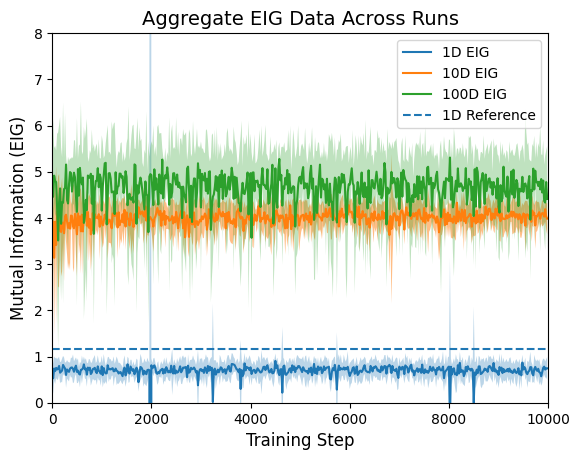

In [13]:
xaxey = np.arange(0, 10000, 20)

fig, ax = plt.subplots()
ax.plot(xaxey, eig_mean.values, label="1D EIG")
ax.plot(xaxey, eig_mean_10D.values, label="10D EIG")
ax.plot(xaxey, eig_mean_100D.values, label="100D EIG")
ax.fill_between(xaxey, eig_mean.values - eig_std.values, eig_mean.values + eig_std.values, alpha=0.3)
ax.fill_between(xaxey, eig_mean_10D.values - eig_std_10D.values, eig_mean_10D.values + eig_std_10D.values, alpha=0.5)
ax.fill_between(xaxey, eig_mean_100D.values - eig_std_100D.values, eig_mean_100D.values + eig_std_100D.values, alpha=0.3)
ax.set_xlabel("Training Step", fontsize=12)
ax.set_ylabel("Mutual Information (EIG)", fontsize=12)
ax.set_title("Aggregate EIG Data Across Runs", fontsize=14)
ax.axhline(y=1.17, linestyle="--", label="1D Reference")
ax.legend()
ax.set_ylim(0., 8.)
ax.set_xlim(0., 10000)

fig.savefig("lin_reg_MI.svg", format="svg")

plt.show()

## Getting optimal experimental designs

In [120]:
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

# Create an empty list to store the EIG data for each run
xi_data_1D = []

# Iterate through each run and extract the EIG data
for run in runs:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_1D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_1D = pd.concat(xi_data_1D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
# xi_mean_100D = xi_df_100D.mean(axis=1)
# xi_std_100D = xi_df_100D.std(axis=1)

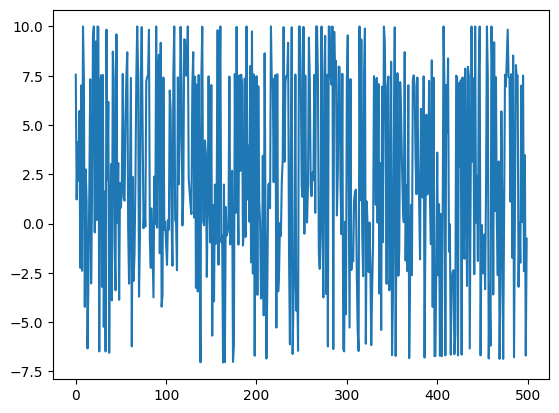

In [121]:
plt.plot(xi_df_1D.iloc[:,2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


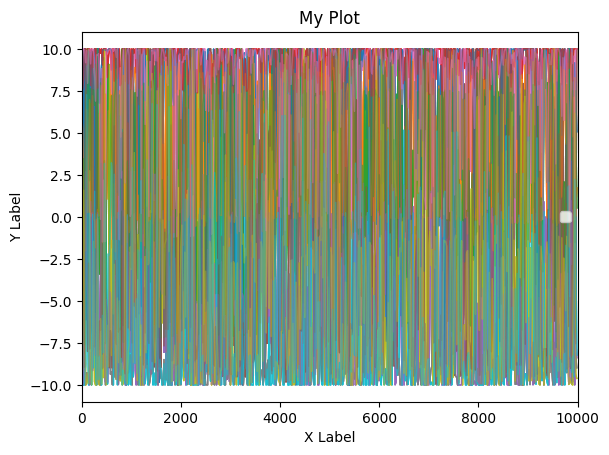

In [ ]:
# plot each column as its own line
fig, ax = plt.subplots()
for col in xi_df_1D.columns:
    ax.plot(xaxey, xi_df_1D[col], linewidth=1, alpha=0.3)

# set plot title, legend, and axis labels
ax.set_title('My Plot')
ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_xlim(0., 10000)

# show the plot
plt.show()

In [6]:
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

# Create an empty list to store the EIG data for each run
xi_data_1D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_1D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_1D = pd.concat(xi_data_1D, axis=1)

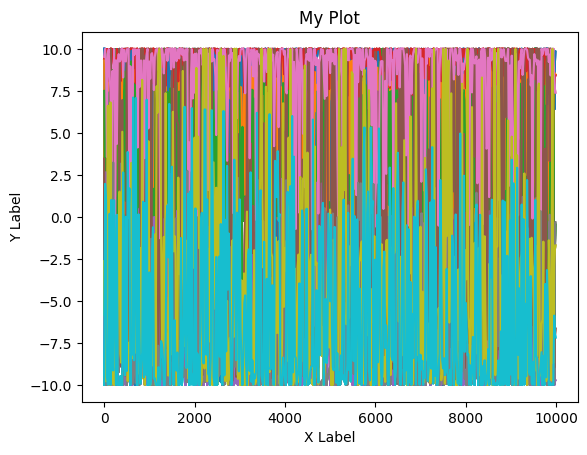

In [7]:
# plot each column as its own line
fig, ax = plt.subplots()
for col in xi_df_1D.columns:
    ax.plot(xaxey, xi_df_1D[col], label=col)

# set plot title, legend, and axis labels
ax.set_title('My Plot')
# ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# show the plot
plt.show()

In [2]:
runs = api.runs("vz_uci/lfiax10D_linReg_ICML")

# Create an empty list to store the EIG data for each run
xi_data_10D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_10D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_10D = pd.concat(xi_data_10D, axis=1)

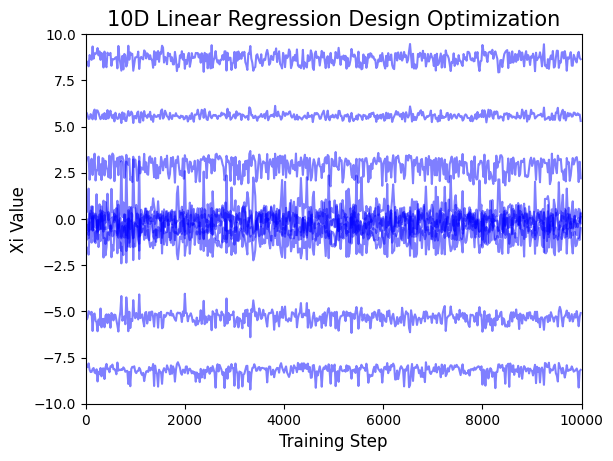

In [8]:
# create a figure and axis object
fig, ax = plt.subplots()

xaxey = np.arange(0, 10000, 20)

# loop through each dimension of the array and plot it as a line
for i in range(10):
    ax.plot(xaxey, xi_df_10D.iloc[:,4].apply(lambda x: x[i]), color='blue', alpha=0.5)

# set plot title, legend, and axis labels
ax.set_title('10D Linear Regression Design Optimization', fontsize=15)
# ax.legend(range(1, 11))
ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Xi Value', fontsize=12)
ax.set_ylim(-10., 10.)
ax.set_xlim(0., 10000.)

fig.savefig("10D_designs.svg", format="svg")

# show the plot
plt.show()


In [ ]:
runs = api.runs("vz_uci/lfiax100D_linReg_ICML")

# Create an empty list to store the EIG data for each run
xi_data_100D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_100D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_100D = pd.concat(xi_data_100D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
# xi_mean_100D = xi_df_100D.mean(axis=1)
# xi_std_100D = xi_df_100D.std(axis=1)

# Analyzing local data from CSV files

In [ ]:
# import os
# import shutil

# def merge_directories(src_root, dst_root):
#     if not os.path.exists(dst_root):
#         os.makedirs(dst_root)

#     for root, dirs, files in os.walk(src_root):
#         for d in dirs:
#             src_dir = os.path.join(root, d)
#             dst_dir = os.path.join(dst_root, os.path.relpath(src_dir, src_root))

#             if not os.path.exists(dst_dir):
#                 os.makedirs(dst_dir)

#         for f in files:
#             if f == "log.csv":
#                 src_file = os.path.join(root, f)
#                 dst_file = os.path.join(dst_root, os.path.relpath(src_file, src_root))

#                 if not os.path.exists(dst_file):
#                     shutil.copy2(src_file, dst_file)

# src_root1 = "neurips"
# src_root2 = "neurips 2"
# dst_root = "neurips_merged"

# merge_directories(src_root1, dst_root)
# merge_directories(src_root2, dst_root)


## Importing data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

def read_csv_file(filepath):
    try:
        df = pd.read_csv(filepath, error_bad_lines=False)
    except pd.errors.ParserError as e:
        print(f"Error reading file {filepath}: {e}")
        return None
    return df

def process_directory(root_dir, parent_dirs, lambda_dirs):
    dfs = []
    for parent_dir in parent_dirs:
        for lambda_dir in lambda_dirs:
            for subdir in ['1', '10', '100']:
                for root, dirs, files in os.walk(os.path.join(root_dir, parent_dir, lambda_dir, subdir)):
                    for file in files:
                        if file == 'log.csv':
                            filepath = os.path.join(root, file)
                            df = read_csv_file(filepath)
                            if df is not None:
                                seed = root.split('/')[-2]
                                df['seed'] = seed
                                df['boed_type'] = parent_dir
                                df['num_designs'] = subdir
                                df['lambda_subdir'] = lambda_dir
                                dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# root_dir = 'neurips 2'
root_dir = 'neurips_merged'
parent_dirs = ['pce_lin_reg', 'snpe_pce_lin_reg']
lambda_dirs = ['lambda_0', 'lambda_0-5', 'lambda_1-0', 'real_lambda_1']
final_df = process_directory(root_dir, parent_dirs, lambda_dirs)


/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_94418/2720368814.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, error_bad_lines=False)
/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_94418/2720368814.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, error_bad_lines=False)
/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_94418/2720368814.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, error_bad_lines=False)
/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_94418/2720368814.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future ver

In [20]:
final_df.head()

STEP        d_sim           Xi      Loss           EIG       time seed  \
0    0  [3.1422853]  [3.1422853]      -0.0  1.251697e-07  56.260121    9   
1    1  [3.2166982]  [3.2166982] -0.146293  1.462928e-01   0.147371    9   
2    2  [3.3015368]  [3.3015368] -0.200557  2.005566e-01   0.143116    9   
3    3  [3.3823845]  [3.3823845]   -0.3203  3.202998e-01   0.140452    9   
4    4   [3.469219]   [3.469219] -0.396106  3.961062e-01   0.140363    9   

     boed_type num_designs lambda_subdir inference_time  
0  pce_lin_reg           1      lambda_0            NaN  
1  pce_lin_reg           1      lambda_0            NaN  
2  pce_lin_reg           1      lambda_0            NaN  
3  pce_lin_reg           1      lambda_0            NaN  
4  pce_lin_reg           1      lambda_0            NaN

In [2]:
final_df = final_df.drop_duplicates()

# Not using previously-seen data, so just using this
final_df = final_df.drop('d_sim', axis=1)

In [3]:
final_df.shape

(2142737, 10)

In [10]:
final_df[-final_df['EIG'].isna()].astype(float)

ValueError: could not convert string to float: '  7.7982135   4.5618925  -7.163329   -2.901949  ]"'

In [5]:
df = final_df[final_df['num_designs'] == '1']


In [40]:
df.shape

(570000, 11)

/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_74012/3765823034.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Xi'] = df['Xi'].apply(extract_float)


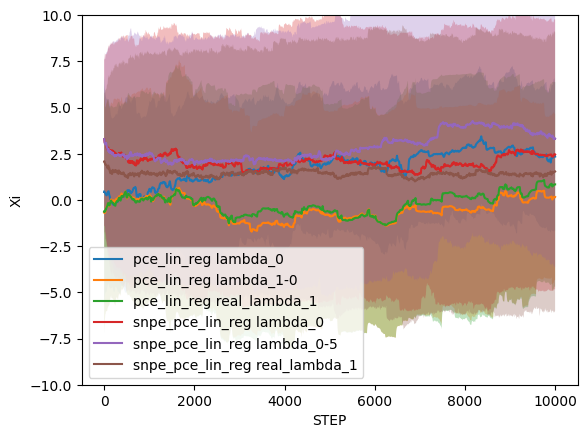

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Assuming df is your pandas DataFrame

# Define a helper function to extract float from the string representation of an array
def extract_float(arr_string):
    float_str = re.search(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', arr_string).group()
    return float(float_str)

# Convert the 'Xi' column to a numeric type
df['Xi'] = df['Xi'].apply(extract_float)

# Group the data by 'boed_type', 'lambda_subdir', 'STEP' and compute mean and std of 'Xi' column
grouped = df.groupby(['boed_type', 'lambda_subdir', 'STEP'])['Xi'].agg(['mean', 'std']).reset_index()

# Create a line plot with fill_between for each 'boed_type' and 'lambda_subdir'
fig, ax = plt.subplots()

for (boed_type, lambda_subdir), group in grouped.groupby(['boed_type', 'lambda_subdir']):
    ax.plot(group['STEP'], group['mean'], label=f'{boed_type} {lambda_subdir}')
    ax.fill_between(group['STEP'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.3)

ax.set_xlabel('STEP')
ax.set_ylabel('Xi')
ax.set_ylim([-10, 10])
ax.legend()

plt.show()


In [57]:
df['EIG'].astype(float)

0          1.251697e-07
1          1.462928e-01
2          2.005566e-01
3          3.202998e-01
4          3.961062e-01
               ...     
1930508    4.223591e-01
1930509    2.685244e+00
1930510    1.467864e+00
1930511    2.539371e+00
1930512    1.141130e+00
Name: EIG, Length: 570000, dtype: float64

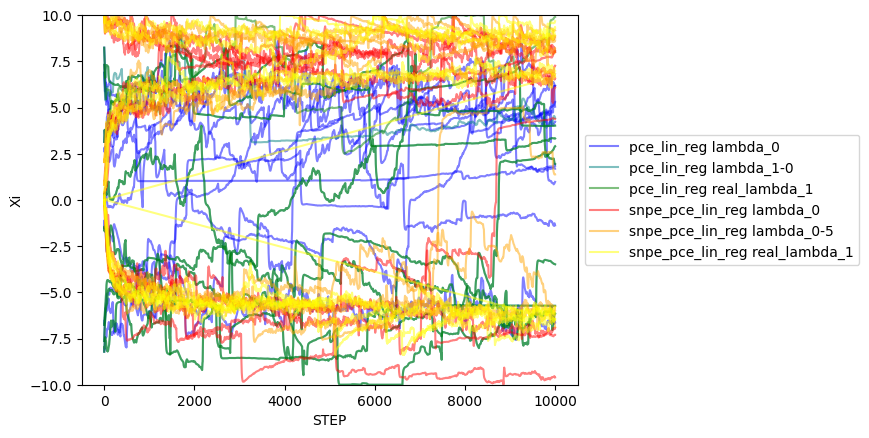

In [59]:
# Create a line plot with faded alpha value for each 'boed_type', 'lambda_subdir', and 'seed'
fig, ax = plt.subplots()

alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'lambda_0'): 'blue',
    ('pce_lin_reg', 'lambda_0-5'): 'purple',
    ('pce_lin_reg', 'lambda_1-0'): 'teal',
    ('pce_lin_reg', 'real_lambda_1'): 'green',
    ('snpe_pce_lin_reg', 'lambda_0'): 'red',
    ('snpe_pce_lin_reg', 'lambda_0-5'): 'orange',
    ('snpe_pce_lin_reg', 'lambda_1-0'): 'pink',
    ('snpe_pce_lin_reg', 'real_lambda_1'): 'yellow',
    # Add more pairs as needed with their corresponding colors
}

for (boed_type, lambda_subdir), group in df.groupby(['boed_type', 'lambda_subdir']):
    for _, seed_group in group.groupby('seed'):
        ax.plot(seed_group['STEP'], seed_group['Xi'], label=f'{boed_type} {lambda_subdir}', color=color_map[(boed_type, lambda_subdir)], alpha=alpha_value)

ax.set_xlabel('STEP')
ax.set_ylabel('Xi')

# Remove duplicates from the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for i, label in enumerate(labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handles[i])

ax.legend(unique_handles, unique_labels, loc="center left", bbox_to_anchor=(1, 0.5))
# ax.legend(["Data"], loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim([-10, 10])

plt.show()


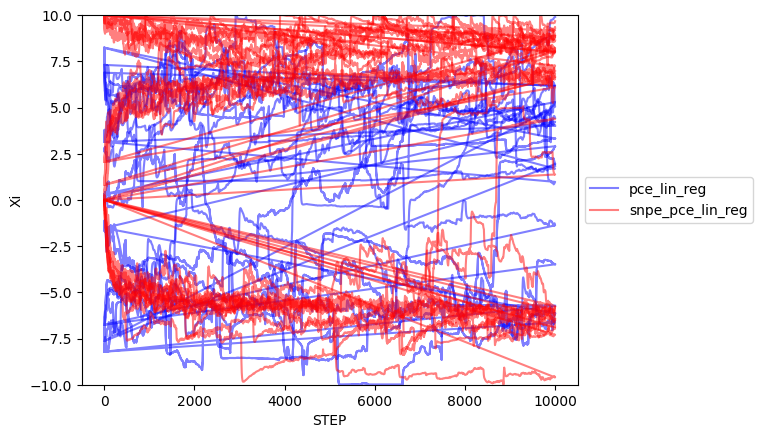

In [60]:
# Create a line plot with faded alpha value for each 'boed_type', 'lambda_subdir', and 'seed'
fig, ax = plt.subplots()

alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type'
color_map = {
    'pce_lin_reg': 'blue',
    'snpe_pce_lin_reg': 'red',
    # Add more 'boed_type' with their corresponding colors
}

for boed_type, group in df.groupby('boed_type'):
    for _, seed_group in group.groupby('seed'):
        ax.plot(seed_group['STEP'], seed_group['Xi'], label=f'{boed_type}', color=color_map[boed_type], alpha=alpha_value)

ax.set_xlabel('STEP')
ax.set_ylabel('Xi')

# Remove duplicates from the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for i, label in enumerate(labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handles[i])

ax.legend(unique_handles, unique_labels, loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim([-10, 10])


plt.show()


## Comparing the EIG

/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_80619/3881014682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EIG'] = df['EIG'].astype(float)


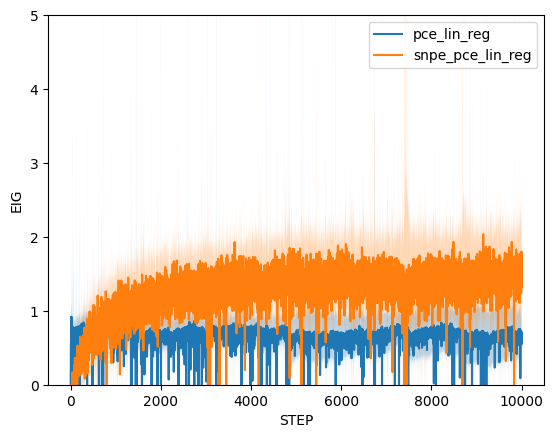

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Convert the 'EIG' column to a numeric type
df['EIG'] = df['EIG'].astype(float)

# Group the data by 'boed_type', 'STEP' and compute mean and std of 'EIG' column
grouped = df.groupby(['boed_type', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a line plot with fill_between for each 'boed_type'
fig, ax = plt.subplots()

for boed_type, group in grouped.groupby('boed_type'):
    ax.plot(group['STEP'], group['mean'], label=f'{boed_type}')
    ax.fill_between(group['STEP'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.3)

ax.set_xlabel('STEP')
ax.set_ylabel('EIG')
ax.set_ylim([0., 5])
ax.legend()

plt.show()


In [12]:
def extract_float(arr_string):
    float_str = re.search(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', arr_string).group()
    return float(float_str)

# Convert the 'Xi' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype('string').apply(extract_float)

TypeError: expected string or bytes-like object

In [16]:
# convert the 'age' column to float and replace invalid values with NaN
final_df['EIG'] = pd.to_numeric(final_df['EIG'], errors='coerce')

# use boolean indexing to isolate rows with NaN values
invalid_rows = final_df['EIG'].isna()
print(final_df[invalid_rows]['STEP'])

610039        -9.104374   -4.5554266  -7.828384   -2.0865743
610040      -7.2779713   6.406623   -1.7848574   2.771556...
610041       8.896487   -3.9341564   4.1774635   0.736564...
610042       2.8860304   4.029966    6.91242     6.989794...
610043      -2.229268   -8.720145    5.0659666  -5.599205...
                                 ...                        
2010152       9.147623    6.4527392   0.44058776  9.76556...
2010312                                -0.39344037  9.464737
2010515                                         476936340332
2010561                                            14.076991
2010700                                             6.349552
Name: STEP, Length: 33369, dtype: object


In [19]:
print(final_df[invalid_rows]['STEP'].shape)

(33369,)


In [21]:
final_df['EIG'].notna().sum()

2109368

In [22]:
final_df.shape - final_df['EIG'].notna().sum()

array([   33369, -2109357])

In [7]:
final_df['EIG'] = final_df['EIG'].astype(float)

ValueError: could not convert string to float: '3.04164 -0.02836633  6.8556523  -3.7494311  -5.3720164'

In [15]:
# Convert the 'EIG' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype(float)

# Group the data by 'boed_type', 'STEP' and compute mean and std of 'EIG' column
grouped = final_df.groupby(['boed_type', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a line plot with fill_between for each 'boed_type'
fig, ax = plt.subplots()

for boed_type, group in grouped.groupby('boed_type'):
    ax.plot(group['STEP'], group['mean'], label=f'{boed_type}')
    ax.fill_between(group['STEP'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.3)

ax.set_xlabel('STEP')
ax.set_ylabel('EIG')
ax.set_ylim([0., 5])
ax.legend()

ValueError: could not convert string to float: '3.04164 -0.02836633  6.8556523  -3.7494311  -5.3720164'

In [76]:
print(final_df[final_df['EIG'].isna()])

                                                      STEP       d_sim  \
610039      -9.104374   -4.5554266  -7.828384   -2.0865743         NaN   
610040    -7.2779713   6.406623   -1.7848574   2.771556...         NaN   
610041     8.896487   -3.9341564   4.1774635   0.736564...         NaN   
610042     2.8860304   4.029966    6.91242     6.989794...         NaN   
610043    -2.229268   -8.720145    5.0659666  -5.599205...         NaN   
...                                                    ...         ...   
2010152     9.147623    6.4527392   0.44058776  9.76556...  -15.175337   
2010312                              -0.39344037  9.464737         NaN   
2010515                                       476936340332         NaN   
2010561                                          14.076991    2.291801   
2010700                                           6.349552   3.1007428   

                          Xi                 Loss  EIG time seed  \
610039                   NaN               

In [67]:
# convert the 'age' column to float and replace invalid values with NaN
final_df['EIG'] = pd.to_numeric(final_df['EIG'], errors='coerce')

# use boolean indexing to isolate rows with NaN values
invalid_rows = final_df['EIG'].isna()
print(df[invalid_rows])

Empty DataFrame
Columns: [STEP, d_sim, Xi, Loss, EIG, time, seed, boed_type, num_designs, lambda_subdir, inference_time]
Index: []


/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_74012/4176455818.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[invalid_rows])


## Evaluating 1D Designs

In [ ]:
import numpy as np
import re

# Filter the dataframe for num_designs == 10
df_10 = final_df[final_df['num_designs'] == '10'].copy()

# Define a helper function to extract float values from a string
def extract_floats(arr_string):
    if not isinstance(arr_string, str):
        return arr_string
    float_strings = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', arr_string)
    return [float(f) for f in float_strings]

# Convert the 'Xi' column to a list of floats
df_10['Xi'] = df_10['Xi'].apply(extract_floats)

## Evaluating 10D designs

In [4]:
import numpy as np
import re

# Filter the dataframe for num_designs == 10
df_10 = final_df[final_df['num_designs'] == '10'].copy()

# Define a helper function to extract float values from a string
def extract_floats(arr_string):
    if not isinstance(arr_string, str):
        return arr_string
    float_strings = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', arr_string)
    return [float(f) for f in float_strings]

# Convert the 'Xi' column to a list of floats
df_10['Xi'] = df_10['Xi'].apply(extract_floats)

In [5]:
df_10['Xi'].head()

100000    [-0.89956284, -8.381839, 9.840965, 7.27334, -7...
100001    [-0.82514995, -8.307426, 9.766552, 7.347753, -...
100002    [-0.78277177, -8.242616, 9.689036, 7.433385, -...
100003    [-0.7151857, -8.290401, 9.604308, 7.524459, -7...
100004    [-0.65738386, -8.329324, 9.516716, 7.5453367, ...
Name: Xi, dtype: object

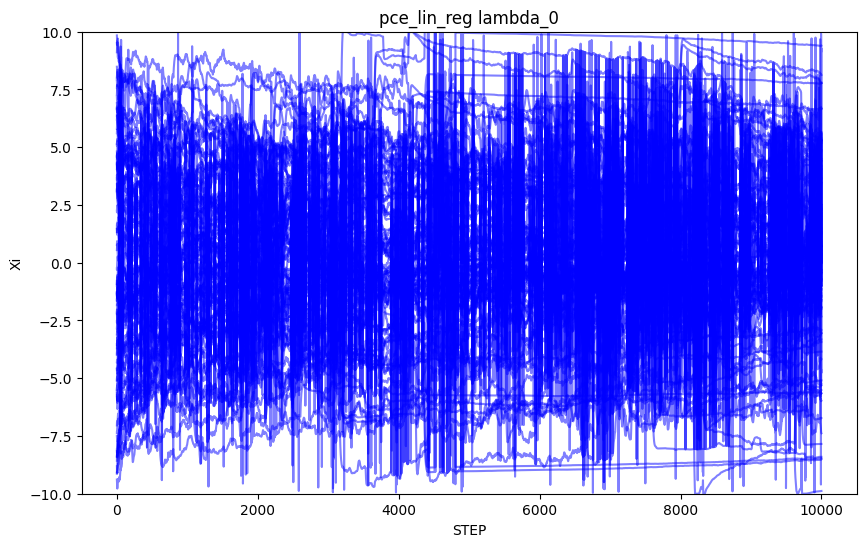

In [7]:
import matplotlib.pyplot as plt
import numpy as np

alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'lambda_0'): 'blue',
    # Add more pairs as needed with their corresponding colors
}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

boed_type_to_plot = 'pce_lin_reg'
lambda_subdir_to_plot = 'lambda_0'

group = df_10[(df_10['boed_type'] == boed_type_to_plot) & (df_10['lambda_subdir'] == lambda_subdir_to_plot)]

for _, seed_group in group.groupby('seed'):
    seed_group = seed_group.sort_values('STEP')  # Sort seed_group by 'STEP'
    steps = seed_group['STEP'].values
    xi_list = seed_group['Xi'].tolist()  # Extract the Xi lists
    
    for i in range(len(xi_list[0])):  # Assuming all Xi lists have the same length
        xi_values = [xi[i] for xi in xi_list]
        ax.plot(steps, xi_values, color=color_map[(boed_type_to_plot, lambda_subdir_to_plot)], alpha=alpha_value)

ax.set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot}')
ax.set_xlabel('STEP')
ax.set_ylabel('Xi')
ax.set_ylim([-10, 10])

plt.show()


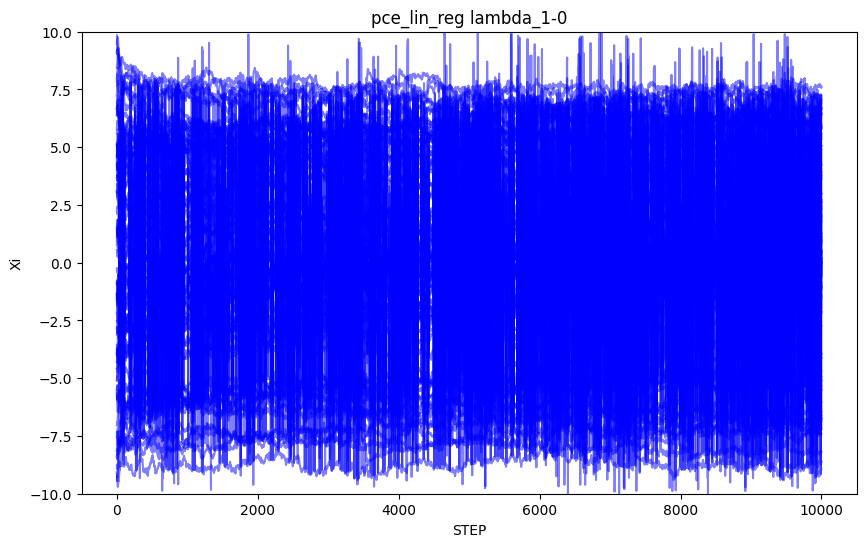

In [8]:
alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'lambda_1-0'): 'blue',
    # Add more pairs as needed with their corresponding colors
}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

boed_type_to_plot = 'pce_lin_reg'
lambda_subdir_to_plot = 'lambda_1-0'

group = df_10[(df_10['boed_type'] == boed_type_to_plot) & (df_10['lambda_subdir'] == lambda_subdir_to_plot)]

for _, seed_group in group.groupby('seed'):
    seed_group = seed_group.sort_values('STEP')  # Sort seed_group by 'STEP'
    steps = seed_group['STEP'].values
    xi_list = seed_group['Xi'].tolist()  # Extract the Xi lists
    
    for i in range(len(xi_list[0])):  # Assuming all Xi lists have the same length
        xi_values = [xi[i] for xi in xi_list]
        ax.plot(steps, xi_values, color=color_map[(boed_type_to_plot, lambda_subdir_to_plot)], alpha=alpha_value)

ax.set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot}')
ax.set_xlabel('STEP')
ax.set_ylabel('Xi')
ax.set_ylim([-10, 10])

plt.show()


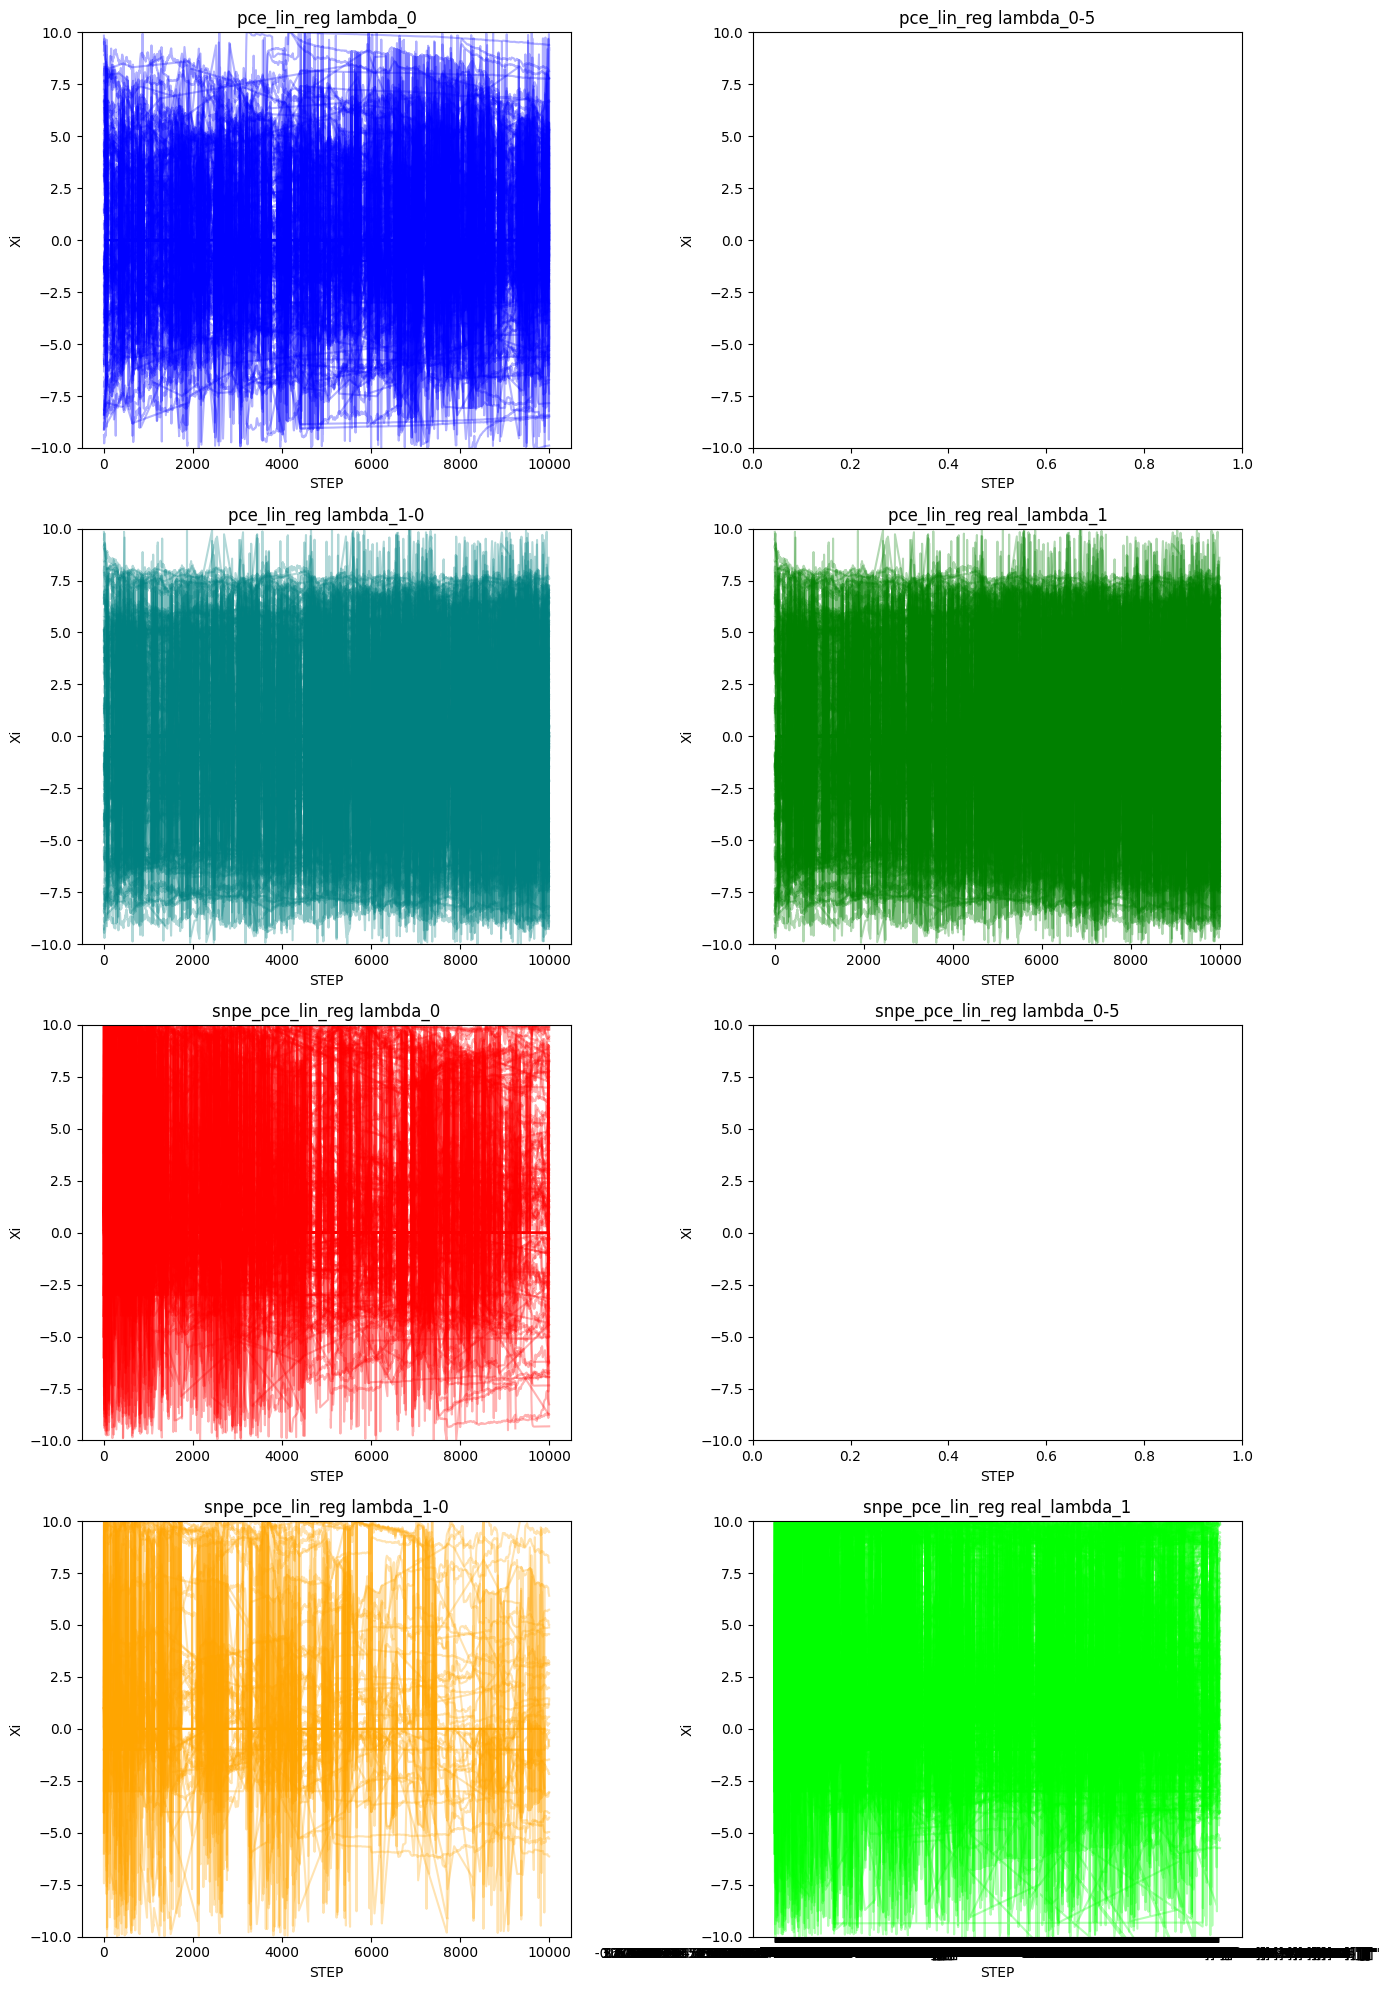

In [15]:
import itertools

alpha_value = 0.3  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'lambda_0'): 'blue',
    ('pce_lin_reg', 'lambda_0-5'): 'purple',
    ('pce_lin_reg', 'lambda_1-0'): 'teal',
    ('pce_lin_reg', 'real_lambda_1'): 'green',
    ('snpe_pce_lin_reg', 'lambda_0'): 'red',
    ('snpe_pce_lin_reg', 'lambda_0-5'): 'black',
    ('snpe_pce_lin_reg', 'lambda_1-0'): 'orange',
    ('snpe_pce_lin_reg', 'real_lambda_1'): 'lime',
}

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
axes = list(itertools.chain.from_iterable(axes))  # Flatten the axes list

for (boed_type, lambda_subdir), ax in zip(color_map.keys(), axes):
    group = df_10[(df_10['boed_type'] == boed_type) & (df_10['lambda_subdir'] == lambda_subdir)]

    for _, seed_group in group.groupby('seed'):
        seed_group = seed_group.sort_values('STEP')  # Sort seed_group by 'STEP'
        steps = seed_group['STEP'].values
        xi_list = seed_group['Xi'].tolist()  # Extract the Xi lists
        
        num_points = max(len(xi) for xi in xi_list if isinstance(xi, list))

        for i in range(num_points):  # Loop through all data points
            xi_values = [xi[i] for xi in xi_list if isinstance(xi, list) and len(xi) > i]  # Extract only available data points
            steps_with_data = [step for step, xi in zip(steps, xi_list) if isinstance(xi, list) and len(xi) > i]
            ax.plot(steps_with_data, xi_values, color=color_map[(boed_type, lambda_subdir)], alpha=alpha_value)


    ax.set_title(f'{boed_type} {lambda_subdir}')
    ax.set_xlabel('STEP')
    ax.set_ylabel('Xi')
    ax.set_ylim([-10, 10])

plt.tight_layout()
plt.show()


## Evaluating 100D Designs

Really just want to look at some of the designs.

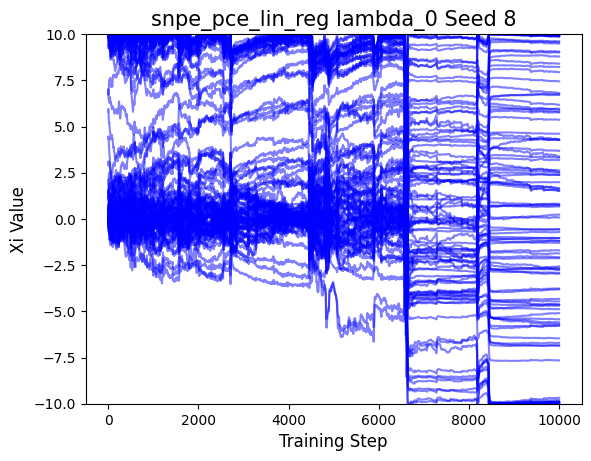

In [55]:
import numpy as np

color_map = {
    ('pce_lin_reg', 'lambda_0'): 'blue',
    ('pce_lin_reg', 'lambda_0-5'): 'purple',
    ('pce_lin_reg', 'lambda_1-0'): 'teal',
    ('pce_lin_reg', 'real_lambda_1'): 'green',
    ('snpe_pce_lin_reg', 'lambda_0'): 'red',
    ('snpe_pce_lin_reg', 'lambda_0-5'): 'black',
    ('snpe_pce_lin_reg', 'lambda_1-0'): 'orange',
    ('snpe_pce_lin_reg', 'real_lambda_1'): 'lime',
}

boed_type_to_plot = 'snpe_pce_lin_reg'
lambda_subdir_to_plot = 'lambda_0'
seed_to_plot = '8'

# Filter the DataFrame for the desired boed_type, lambda_subdir, and num_designs
filtered_df =final_df[(final_df['boed_type'] == boed_type_to_plot) & (final_df['lambda_subdir'] == lambda_subdir_to_plot) & (final_df['num_designs'] == '100') & (final_df['seed'] == seed_to_plot)]

# Sort filtered_df by 'STEP'
filtered_df = filtered_df.sort_values('STEP')

# Create a figure and axis object
fig, ax = plt.subplots()

steps = filtered_df['STEP'].values
xi_list = filtered_df['Xi'].tolist()  # Extract the Xi lists

# Convert string elements to lists of floats
xi_list = [list(map(float, re.findall(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', xi))) if isinstance(xi, str) else xi for xi in xi_list]

# Check if there are any list elements in xi_list
if any(isinstance(xi, list) for xi in xi_list):
    # Filter out non-list elements and find the maximum length
    num_points = max(len(xi) for xi in xi_list if isinstance(xi, list))

    for i in range(num_points):  # Loop through all data points
        xi_values = [xi[i] for xi in xi_list if isinstance(xi, list) and len(xi) > i]  # Extract only available data points
        ax.plot(steps, xi_values, color='blue', alpha=0.5)

# Set plot title, legend, and axis labels
ax.set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot} Seed {seed_to_plot}', fontsize=15)
ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Xi Value', fontsize=12)
ax.set_ylim([-10, 10])

# Show the plot
plt.show()


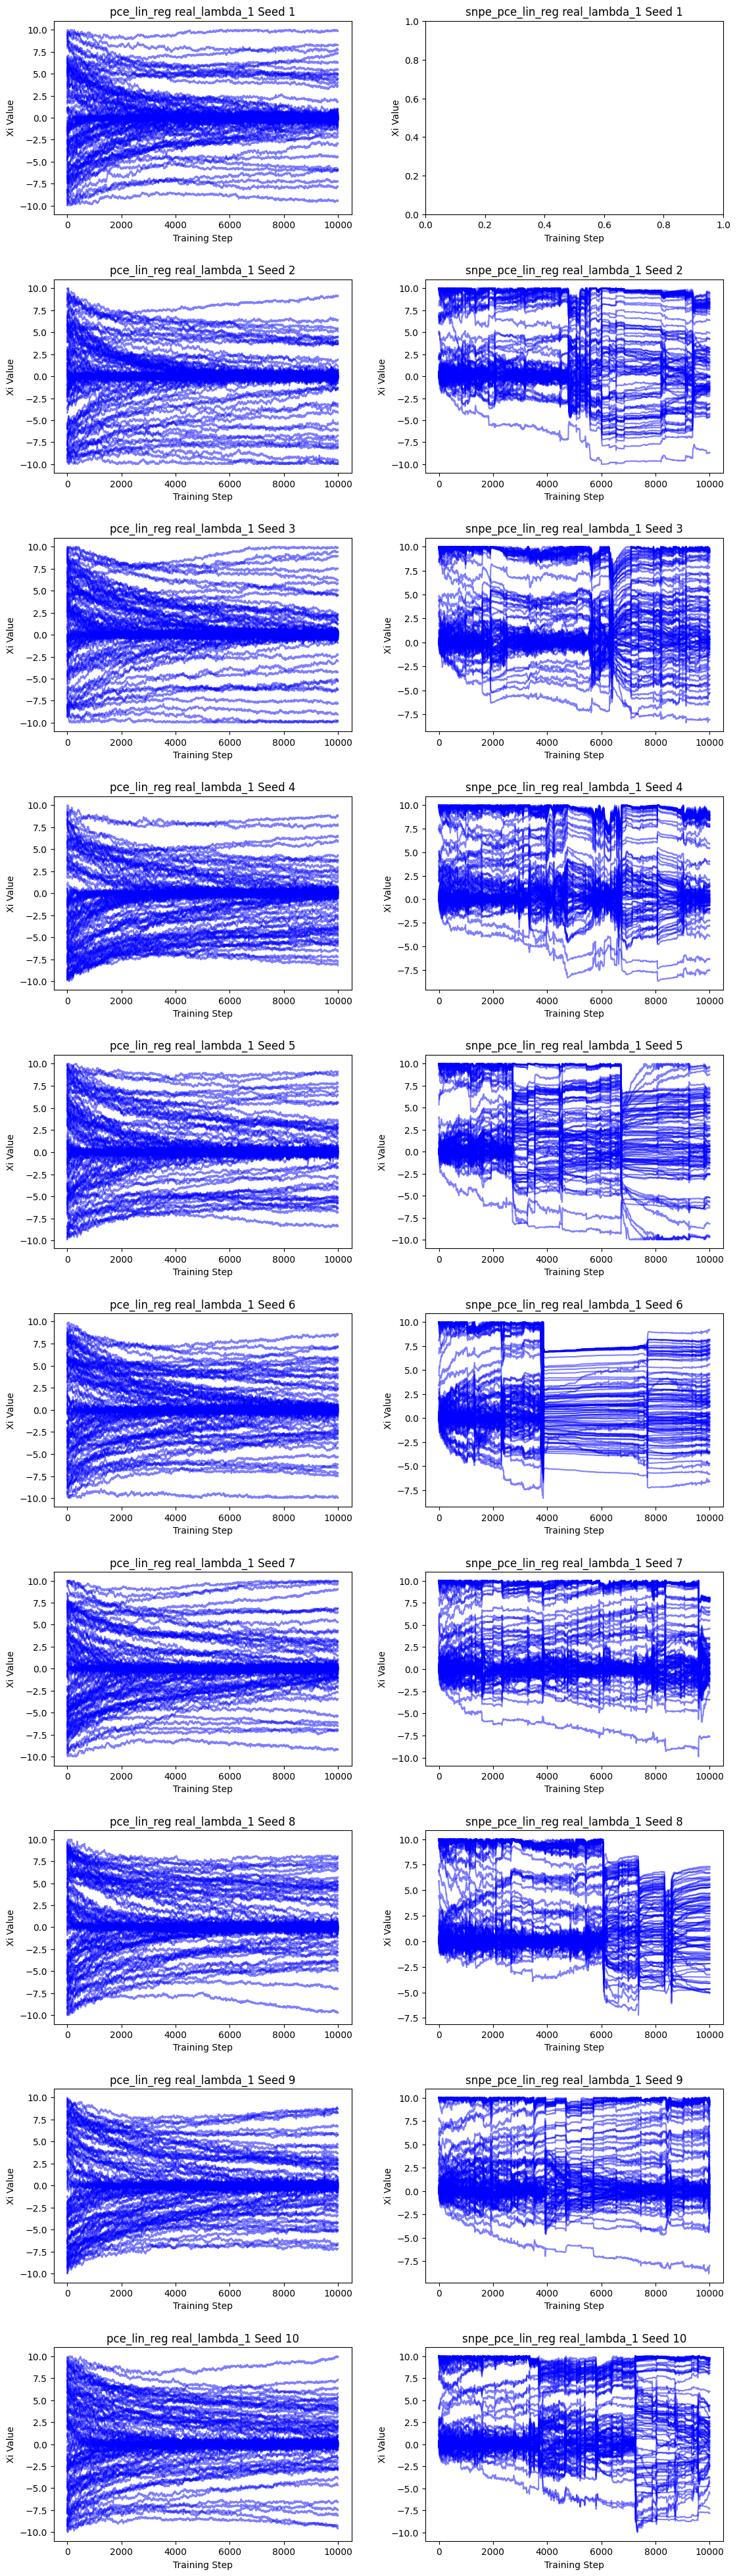

In [66]:
import numpy as np
import re
import matplotlib.pyplot as plt

lambda_subdir_to_plot = 'real_lambda_1'
num_seeds = 10
boed_types = ['pce_lin_reg', 'snpe_pce_lin_reg']

# Create a 10x2 grid of subplots
fig, axes = plt.subplots(num_seeds, 2, figsize=(12, 40))
fig.tight_layout(pad=5)

# Iterate through each boed_type and seed combination
for boed_type_idx, boed_type_to_plot in enumerate(boed_types):
    for seed_to_plot in range(1, num_seeds + 1):
        # Filter the DataFrame for the desired boed_type, lambda_subdir, and seed
        filtered_df =final_df[(final_df['boed_type'] == boed_type_to_plot) & (final_df['lambda_subdir'] == lambda_subdir_to_plot) & (final_df['num_designs'] == '100') & (final_df['seed'] == str(seed_to_plot))]

        # Sort filtered_df by 'STEP'
        filtered_df = filtered_df.sort_values('STEP')

        steps = filtered_df['STEP'].values
        xi_list = filtered_df['Xi'].tolist()  # Extract the Xi lists

        # Convert string elements to lists of floats
        xi_list = [list(map(float, re.findall(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', xi))) if isinstance(xi, str) else xi for xi in xi_list]

        # Check if there are any list elements in xi_list
        if any(isinstance(xi, list) for xi in xi_list):
            # Filter out non-list elements and find the maximum length
            num_points = max(len(xi) for xi in xi_list if isinstance(xi, list))

            for i in range(num_points):  # Loop through all data points
                xi_values = [xi[i] for xi in xi_list if isinstance(xi, list) and len(xi) > i]  # Extract only available data points
                axes[seed_to_plot - 1, boed_type_idx].plot(steps, xi_values, color='blue', alpha=0.5)

        # Set plot title, legend, and axis labels
        axes[seed_to_plot - 1, boed_type_idx].set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot} Seed {seed_to_plot}', fontsize=12)
        axes[seed_to_plot - 1, boed_type_idx].set_xlabel('Training Step', fontsize=10)
        axes[seed_to_plot - 1, boed_type_idx].set_ylabel('Xi Value', fontsize=10)

# Show the plot
plt.show()
